In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

In [12]:
x1 = pd.ExcelFile("21July2023.xlsx")
labels = x1.sheet_names[1:]
data = x1.parse("Combined")
data.head()


,Labels,1,2,3,4,5,6,7,8,9,...,941,942,943,944,945,946,947,948,949,950
0,1,0.001784,0.001890,0.002317,0.002796,0.002439,0.001923,0.001943,0.001915,0.001622,...,0.038760,0.037061,0.034359,0.030928,0.027107,0.022811,0.017873,0.012618,0.007515,0.002380
1,1,0.005865,0.005678,0.004939,0.004540,0.004444,0.004045,0.003532,0.003293,0.003275,...,0.039604,0.037985,0.035514,0.032214,0.028098,0.023470,0.018736,0.013761,0.008256,0.002628
2,1,0.003950,0.004287,0.003754,0.003313,0.003075,0.002633,0.002426,0.003007,0.003869,...,0.038517,0.036920,0.034223,0.030759,0.026847,0.022560,0.017889,0.012917,0.007715,0.002335
3,1,0.004189,0.003944,0.003358,0.003375,0.003706,0.003612,0.003777,0.004477,0.004520,...,0.043726,0.041731,0.038692,0.034740,0.030385,0.025687,0.020502,0.014975,0.009120,0.002938
4,1,0.005986,0.006153,0.005847,0.005600,0.005518,0.005520,0.005586,0.005484,0.005013,...,0.043212,0.041013,0.038018,0.034420,0.030260,0.025415,0.020021,0.014498,0.008820,0.002972


In [13]:
lab = data.values[:,0].astype('uint8') 
lab

array([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 10,
       10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15,
       15, 15, 16, 16, 16, 17, 17, 17], dtype=uint8)

In [14]:
feat = data.values[:,1:]
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)
dfeat

array([[ 2.23969959e-04,  1.36823587e-04,  6.79520457e-05, ...,
        -5.22881099e-03, -4.96635287e-03, -4.32886898e-03],
       [-2.48853750e-04, -3.76746171e-04, -4.37489625e-04, ...,
        -5.38003813e-03, -5.24850210e-03, -4.79050106e-03],
       [-8.55909265e-04, -5.02503110e-04, -2.57710531e-04, ...,
        -5.18555172e-03, -4.97684506e-03, -4.42302405e-03],
       ...,
       [ 2.05845696e-04, -1.57446367e-04, -3.84801611e-04, ...,
        -5.90541873e-03, -5.55009163e-03, -4.74959227e-03],
       [ 4.14872294e-04,  1.59931902e-04, -3.71017880e-05, ...,
        -6.18624548e-03, -5.91129057e-03, -5.20697693e-03],
       [ 4.98335001e-04,  2.46174762e-04,  2.62972496e-05, ...,
        -5.98923665e-03, -5.68518263e-03, -4.94744239e-03]])

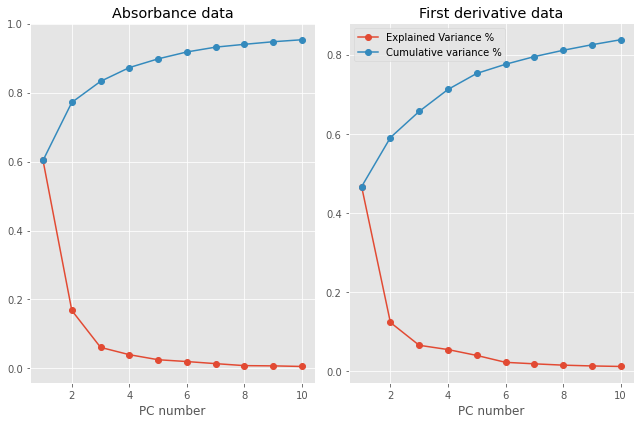

In [15]:
nc = 10
pca1 = pca(n_components=nc)
pca2 = pca(n_components=nc)
 
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)
 
# Fit the spectral data and extract the explained variance ratio
X1 = pca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
 
# Fit the first data and extract the explained variance ratio
X2 = pca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_
 
# Plot data
pc_array = np.linspace(1,nc,nc)
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(pc_array, expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(pc_array, np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
 
    ax2.plot(pc_array, expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(pc_array, np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
 
    plt.legend()
    plt.show()

In [16]:
pca2 = pca(n_components=8)
 
# Transform on the scaled features
Xt2 = pca2.fit_transform(nfeat2)

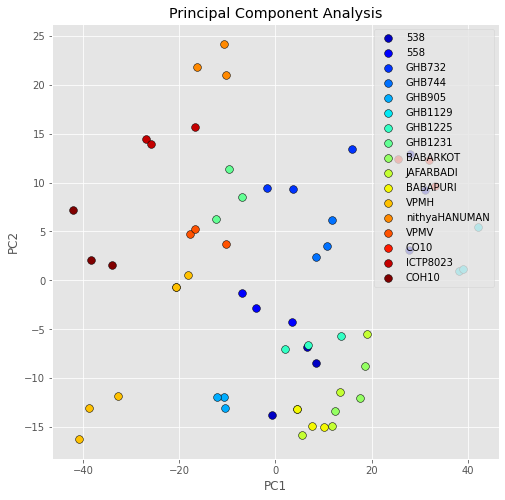

In [28]:
labplot = labels
 
# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8, 8))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xt2[j,0] for j in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

In [20]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
 
x1 = pd.ExcelFile("21July2023.xlsx")
labels = x1.sheet_names[1:]
data = x1.parse("Combined")
 
y = data.values[:,0].astype('uint8')
X = data.values[:,1:]
 
lda = LDA(n_components=9)
Xlda = lda.fit_transform(X,y)

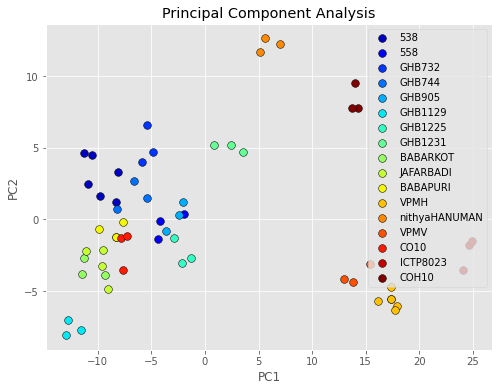

In [21]:
labplot = labels
 
# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,6))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xlda[j,0] for j in range(len(Xlda[:,0])) if lab[j] == u]
        yi = [Xlda[j,1] for j in range(len(Xlda[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

In [22]:

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
 
lda = LDA()
lda.fit(X_train,y_train)
 
y_pred = lda.predict(X_test)
print(lda.score(X_test,y_test))

0.5333333333333333


In [24]:
scores = cross_val_score(LDA(), X, y, cv=2)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.5414 (+/- 0.1172)


In [25]:
pca = pca(n_components=15)
Xpc = pca.fit_transform(X)
scores = cross_val_score(LDA(), Xpc, y, cv=2)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.5759 (+/- 0.0483)
